Importing the Dataset

In [1]:
from google.colab import drive; drive.mount('/content/drive')
path = "/content/drive/MyDrive/personalized_medicine_gene_expression/data/"

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv(path + "gene_expression_drug_response.csv")

Evaluation of ROC, AUC and Confusion Matrix

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('Drug_Response', axis=1); y = df['Drug_Response']
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=10).fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [5]:
from sklearn.metrics import roc_auc_score
print('AUC Score:', roc_auc_score(y_test, y_prob))

AUC Score: 0.4270833333333333


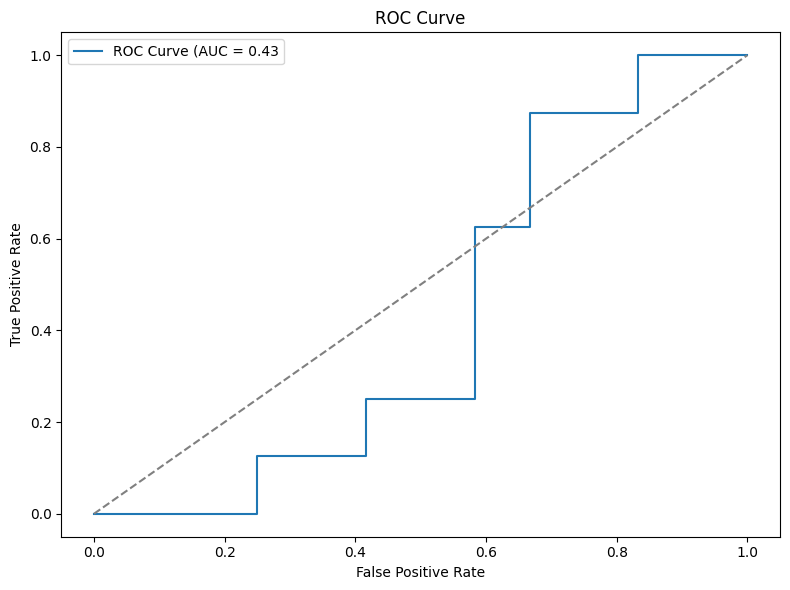

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve'); plt.legend(); plt.tight_layout()
plt.savefig(path + 'roc_curve.png'); plt.show()

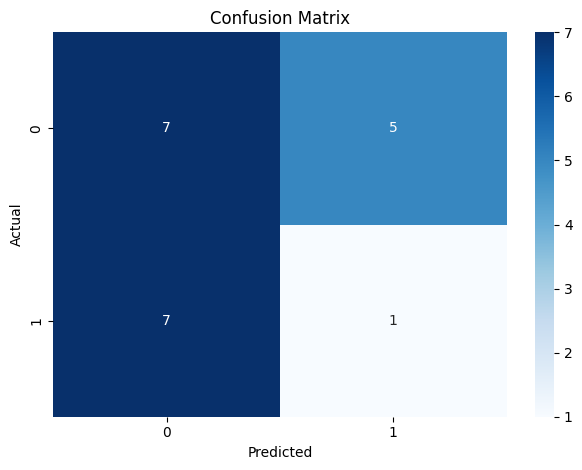

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout(); plt.savefig(path + 'confusion_matrix.png'); plt.show()